In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

import seaborn as sns
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

import plotly
import plotly.express as px
# set plotly template to dark
plotly.io.templates.default = "plotly_dark"



# Data Preparation
## Clean Data

https://github.com/rfordatascience/tidytuesday

### Anime Dataset

https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-04-23

In [ ]:
raw_anime_df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-04-23/raw_anime.csv")

In [ ]:
raw_anime_df.head()

,animeID,name,title_english,title_japanese,title_synonyms,type,source,producers,genre,studio,...,scored_by,rank,popularity,members,favorites,synopsis,background,premiered,broadcast,related
0,1,Cowboy Bebop,Cowboy Bebop,カウボーイビバップ,[],TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],...,405664.0,26.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",When Cowboy Bebop first aired in spring of 199...,Spring 1998,Saturdays at 01:00 (JST),"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,カウボーイビバップ 天国の扉,"[""Cowboy Bebop: Knockin' on Heaven's Door""]",Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],...,120243.0,164.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,NaN,NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,トライガン,[],TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],...,212537.0,255.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",The Japanese release by Victor Entertainment h...,Spring 1998,Thursdays at 01:15 (JST),"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,7,Witch Hunter Robin,Witch Hunter Robin,Witch Hunter ROBIN,['WHR'],TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],...,32837.0,2371.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,NaN,Summer 2002,Tuesdays at Unknown,{}
4,8,Bouken Ou Beet,Beet the Vandel Buster,冒険王ビィト,['Adventure King Beet'],TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],...,4894.0,3544.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,NaN,Fall 2004,Thursdays at 18:30 (JST),"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."


In [ ]:
# drop NaN
df_temp = raw_anime_df.copy()
print(f"Anime raw dataset shape {df_temp.shape}")
df_temp = raw_anime_df.dropna()
print(f"Anime dataset without NaN shape {df_temp.shape}")

Anime raw dataset shape (15278, 27)
Anime dataset without NaN shape (456, 27)


In [ ]:
# drop column in Japanese
df_temp = df_temp.drop('title_japanese', axis =1)

In [ ]:
# select a column to clean
df_select = df_temp[['animeID', 'name', 'producers']]
df_select.head(4)

,animeID,name,producers
0,1,Cowboy Bebop,['Bandai Visual']
2,6,Trigun,['Victor Entertainment']
5,16,Hachimitsu to Clover,"['Genco', 'Fuji TV', 'Shueisha']"
9,20,Naruto,"['TV Tokyo', 'Aniplex', 'Shueisha']"


In [ ]:
from ast import literal_eval

In [ ]:
df_select.loc[:, 'producers'] = df_select['producers'].apply(literal_eval)

In [ ]:
df_select.explode('producers')

,animeID,name,producers
0,1,Cowboy Bebop,Bandai Visual
2,6,Trigun,Victor Entertainment
5,16,Hachimitsu to Clover,Genco
5,16,Hachimitsu to Clover,Fuji TV
5,16,Hachimitsu to Clover,Shueisha
...,...,...,...
14164,37555,Hangyakusei Million Arthur,bilibili
14164,37555,Hangyakusei Million Arthur,Bandai Namco Arts
14164,37555,Hangyakusei Million Arthur,Happinet
14535,38083,Ken En Ken: Aoki Kagayaki,TV Tokyo


# Data Consolidation
## Scaling a Dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# generate 1000 data points randomly drawn from an exponential distribution
original_exp_df = pd.DataFrame(np.random.exponential(size = 1000), columns=['x'])
original_exp_df.head(4)

,x
0,1.691681
1,1.129465
2,0.914661
3,0.326420


In [ ]:
#scale 
mm_scaler = MinMaxScaler(feature_range=(0,1))
scaled_exp_arr = mm_scaler.fit_transform(original_exp_df)
scaled_exp_df = pd.DataFrame(scaled_exp_arr, columns=['x'])
scaled_exp_df.head(4)

,x
0,0.258657
1,0.172642
2,0.139779
3,0.049784


**histogram**
- great for summarising distributions
- explore different bin widths to pull out 

In [ ]:
#plots
px.histogram(original_exp_df, x="x")

In [ ]:
px.histogram(scaled_exp_df, x="x")

# Exploratory Data Analysis
## Basic Statistics
https://www.kaggle.com/rtatman/lego-database?select=colors.csv

In [ ]:
# import cereals dataset
cereal_df = pd.read_csv('Data/cereal.csv')
cereal_df.head(4)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912


In [ ]:
print(cereal_df.describe())

         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  77.000000   
mean   106.883117   2.545455   1.012987  159.675325   2.151948  14.597403   
std     19.484119   1.094790   1.006473   83.832295   2.383364   4.278956   
min     50.000000   1.000000   0.000000    0.000000   0.000000  -1.000000   
25%    100.000000   2.000000   0.000000  130.000000   1.000000  12.000000   
50%    110.000000   3.000000   1.000000  180.000000   2.000000  14.000000   
75%    110.000000   3.000000   2.000000  210.000000   3.000000  17.000000   
max    160.000000   6.000000   5.000000  320.000000  14.000000  23.000000   

          sugars      potass    vitamins      shelf     weight       cups  \
count  77.000000   77.000000   77.000000  77.000000  77.000000  77.000000   
mean    6.922078   96.077922   28.246753   2.207792   1.029610   0.821039   
std     4.444885   71.286813   22.342523   0.832524   0.150477   0.232716  

In [ ]:
display(cereal_df.mean())

calories    106.883117
protein       2.545455
fat           1.012987
sodium      159.675325
fiber         2.151948
carbo        14.597403
sugars        6.922078
potass       96.077922
vitamins     28.246753
shelf         2.207792
weight        1.029610
cups          0.821039
rating       42.665705
dtype: float64

In [ ]:
cereal_df.select_dtypes(include='float').agg(['mean','std','sum']) 

,fiber,carbo,weight,cups,rating
mean,2.151948,14.597403,1.029610,0.821039,42.665705
std,2.383364,4.278956,0.150477,0.232716,14.047289
sum,165.700000,1124.000000,79.280000,63.220000,3285.259284


In [ ]:
cereal_df.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


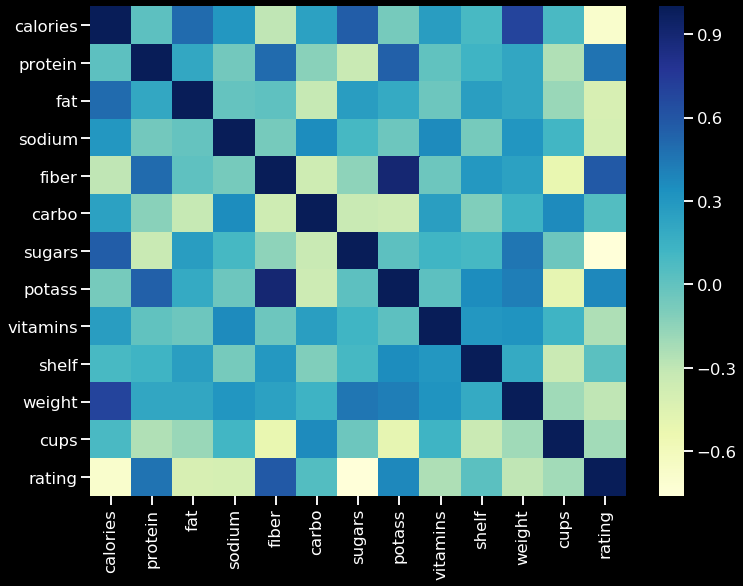

In [ ]:
plt.figure(figsize=(12, 9))
sns.heatmap(cereal_df.corr(),cmap="YlGnBu") 

# Visualization
## Plotly
https://plotly.com/graphing-libraries

In [ ]:
import plotly.express as px
# and load a standar dataset like tips
plotly_df_tips = px.data.tips()
plotly_df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**bar plot**
- useful favourite for showing a set of discrete values, e.g. counts of categories

In [ ]:
fig = px.bar(plotly_df_tips, x="day", y="total_bill", color="smoker")
fig.show()

**scatter  plots**
- useful for showing relationships between two variables
- effective use can be made of point colour, size and shape
- give some consideration to which features you map 
- distinct colours can be informative for discrete (categorical) features

**line plots**
- great for plotting a continuous sequence of values

In [ ]:
fig = px.scatter(plotly_df_tips, x="tip", y="total_bill", color="smoker", marginal_y="violin",
           marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [ ]:
fig = px.scatter(plotly_df_tips, x="total_bill", y="tip", hover_name="time")
fig.show()


# Feature Engineering

## One Hot Encoding

[https://pbpython.com/categorical-encoding.html](https://pbpython.com/categorical-encoding.html)

In [ ]:
# Define the headers since the data does not have any
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

df_for_encoding = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )
df_for_encoding.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [ ]:
# get categorical columns
obj_df_for_encoding = df_for_encoding.select_dtypes(include=['object']).copy()
obj_df_for_encoding.head()

,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,engine_type,num_cylinders,fuel_system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [ ]:
pd.get_dummies(obj_df_for_encoding, columns=["drive_wheels"]).head()


,make,fuel_type,aspiration,num_doors,body_style,engine_location,engine_type,num_cylinders,fuel_system,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,alfa-romero,gas,std,two,convertible,front,dohc,four,mpfi,0,0,1
1,alfa-romero,gas,std,two,convertible,front,dohc,four,mpfi,0,0,1
2,alfa-romero,gas,std,two,hatchback,front,ohcv,six,mpfi,0,0,1
3,audi,gas,std,four,sedan,front,ohc,four,mpfi,0,1,0
4,audi,gas,std,four,sedan,front,ohc,five,mpfi,1,0,0


# Modelling
## Cross-validation Visualization

[Sklearn Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html#permutation-test-score)

[Sklearn Plot Cross Validation](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html)

### K- fold cross validation

In [ ]:
from sklearn.model_selection import KFold,ShuffleSplit, StratifiedKFold

In [ ]:
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

In [ ]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)

    ax.scatter(range(len(X)), [ii + 2.5] * len(X),
               c=group, marker='_', lw=lw, cmap=cmap_data)

    # Formatting
    yticklabels = list(range(n_splits)) + ['class', 'group']
    ax.set(yticks=np.arange(n_splits+2) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+2.2, -.2], xlim=[0, 100])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    return ax

In [ ]:
# Generate the class/group data
n_points = 100
X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
y = np.hstack([[ii] * int(100 * perc)
               for ii, perc in enumerate(percentiles_classes)])

# Evenly spaced groups repeated once
groups = np.hstack([[ii] * 10 for ii in range(10)])
n_splits = 4

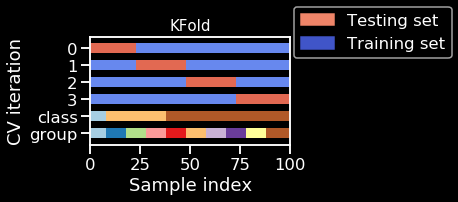

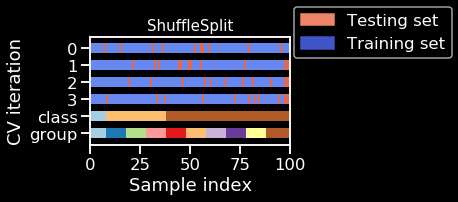

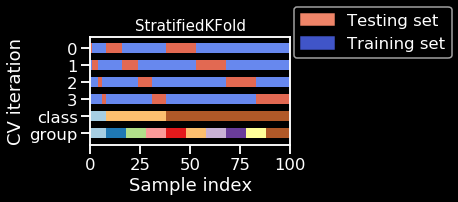

In [ ]:
cvs = [KFold, ShuffleSplit, StratifiedKFold]


for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(6, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
              ['Testing set', 'Training set'], loc=(1.02, .8))
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=.7)
plt.show()

# Modelling
## Model Selection